<a href="https://colab.research.google.com/drive/1vvIqAg3wVAUmZKIp9hAClyE874poOTeO?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size = 5>AI SATURDAY LAGOS COHORT 8</font></h1>   

   
<h2 align=center><font size = 6>DATA EXPLORATION AND VISUALIZATION PRACTICAL</font></h2><br>
  
  

<h3 align=center><font size = 3>(PROJECT: Story Telling on Google Play Store apps and reviews </font></h3>


<h5 align=center><font size = 2>Data Source: <a href="https://www.kaggle.com/datasets/lava18/google-play-store-apps">Kaggle.<a/></font></h5>

In [ ]:
# import libraries

import pandas as pd                     # for data manipulation and cleaning

import matplotlib.pyplot as plt         # for data visulization
import seaborn as sns                   # for data visulization
import plotly.express as px             # for data visulization

## Data Loading
[Link to the Datasets](https://drive.google.com/drive/folders/1RzOyO5TxrNIHWV7vzdSQz5rvT0IFGVKB)

In [ ]:
# Read in dataset
apps_data = ...

In [ ]:
apps_data.head(10)
# apps_data.tail()

### Data Dictionary

**data_apps.csv**

| variable       | class     | description                                                                  |
|:---------------|:----------|:-----------------------------------------------------------------------------|
| App            | character | The application name                                                         |
| Category       | character | The category the app belongs to                                              |
| Rating         | numeric   | Overall user rating of the app                                               |
| Reviews        | numeric   | Number of user reviews for the app                                           |
| Size           | character | The size of the app                                                          |
| Installs       | character | Number of user installs for the app                                          |
| Type           | character | Either "Paid" or "Free"                                                      |
| Price          | character | Price of the app                                                             |
| Content Rating | character | The age group the app is targeted at - "Children" / "Mature 21+" / "Adult"   |
| Genres         | character | Possibly multiple genres the app belongs to                                  |
| Last Updated   | character | The date the app was last updated                                            |
| Current Ver    | character | The current version of the app                                               |
| Android Ver    | character | The Android version needed for this app                                      |



In [ ]:
# check the shape of the data


(9659, 14)

In [ ]:
# check the data types of each features
apps_data.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


## Data Cleaning

In [ ]:
# save a copy of the data
apps_data_copy = ...

In [ ]:
# drop the `Unnamed` column
apps_data.drop(columns=["..."], inplace=True)

In [ ]:
# Check for duplicates
duplicates = apps_data.duplicated()
duplicates.sum()

0

In [ ]:
# Drop duplicates from apps_with_duplicates
apps = apps_data.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps.shape[0])

Total number of apps in the dataset =  9659


In [ ]:
# apps_data['Price'] = apps_data['Price'].str.replace('[$]', '', regex=True)

### Removing special characters

<p>By looking at a random sample of the dataset rows, we observe that some entries in the columns like <code>Installs</code> and <code>Price</code> have a few special characters (<code>+</code> <code>,</code> <code>$</code>) due to the way the numbers have been represented. This prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. Ideally, as their names suggest, we would want these columns to contain only digits from [0-9].</p>
<p>Hence, we now proceed to clean our data. Specifically, the special characters <code>,</code> and <code>+</code> present in <code>Installs</code> column and <code>$</code> present in <code>Price</code> column need to be removed.</p>

In [ ]:
# List of characters to remove
chars_to_remove = ['+',',','$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps_data[col] = apps_data[col].apply(lambda x: x.replace(char, ''))

### Correcting data types

In [ ]:
# Convert Installs to float data type
apps_data['...'] = apps_data['...'].astype(int)

# Convert Price to float data type
apps_data['...'] = apps_data['...'].astype(float)

# Checking dtypes of the apps dataframe
apps_data.dtypes

In [ ]:
# Conver the Last Updated feature to a datetime datatype
apps_data['Last Updated'] = pd.to_datetime(apps_data['Last Updated'], format='%B %d, %Y')

In [ ]:
# Checking statistics of the numeric features
apps_data.describe()

,Rating,Reviews,Size,Installs,Price
count,8196.000000,9.659000e+03,8432.000000,9.659000e+03,9659.000000
mean,4.173243,2.165926e+05,20.395327,7.777507e+06,1.099299
std,0.536625,1.831320e+06,21.827509,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


### Creating a wrangle function

In [ ]:
def wrangle_data(data_path):
    """
    Data Loading and Cleaning:
    - Load the dataset from the specified data file.
    - Perform data cleaning steps such as handling missing values, removing duplicates, and fixing data types.

    Parameters:
        data_path (str): The file path to the dataset.

    Returns:
        pd.DataFrame: Cleaned and processed DataFrame.
    """
    apps = pd.read_csv(data_path)
    apps = apps.drop(columns=["Unnamed: 0"])

    # List of characters to remove
    chars_to_remove = ['+',',']
    # List of column names to clean
    cols_to_clean = ['Installs', 'Price']

    # Loop for each column in cols_to_clean
    # for col in cols_to_clean:
        # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps["Installs"] = apps["Installs"].apply(lambda x: x.replace(char, ''))

    apps['Price'] = apps['Price'].str.replace('[$]', '', regex=True)

    # # Convert Installs to float data type
    apps['Installs'] = apps['Installs'].astype(int)

    # # Convert Price to float data type
    apps['Price'] = apps['Price'].astype(float)

    apps['Last Updated'] = pd.to_datetime(apps['Last Updated'], format='%B %d, %Y')


    return apps

In [ ]:
def wrangle_data(data_path):
    """
    Data Loading and Cleaning:
    - Load the dataset from the specified data file.
    - Perform data cleaning steps such as handling missing values, removing duplicates, and fixing data types.

    Parameters:
        data_path (str): The file path to the dataset.

    Returns:
        pd.DataFrame: Cleaned and processed DataFrame.
    """

    ...

    return apps_data

In [ ]:
# Call the wrange_data function

### Gain Insights

When visualizing a dataset, the aim is to extract insights on what information exists within the data.

1. Which category has the highest share of (active) apps in the market?
  
2. Which app categories are the most popular in terms of the number of installations?
3. Is there a relationship between app price and the number of installations, and how does it differ by content rating?
4. How have user reviews for apps changed over time?
5. Is there a correlation between app price and ratings, and does it vary by app category?
6. How does the sentiment of user reviews vary across different app categories, and which categories tend to have more positive reviews?
7. How does the size of apps vary by category?
8. Is there a correlation between app ratings and the number of reviews?
9. How does the distribution of app prices vary by content rating?
10. Is there a relationship between app size and the number of installations?
11. What is the sentiment distribution of app reviews?

## Data Exploration and Visualization

1. Which category has the highest share of (active) apps in the market?


In [ ]:
num_categories = apps_data['...'].unique()
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'.
num_apps_in_category = ...
print(num_apps_in_category)

In [ ]:
# plt.figure(figsize=(15, 6)) #, barh
num_apps_in_category.plot(x = ..., y = ..., kind='bar');


In [ ]:
fig, ax = plt.subplots()
# fig.set_size_inches(15, 6)

ax = sns.barplot(x = ..., y = ...)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Add x and y label axis

# Add plot title


In [ ]:
# Using plotly
fig = px.bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)

fig.update_layout(
    title='Barplot showing the Share of apps per Category',
    xaxis_title='Categories',
    yaxis_title='Count'
)

fig.show()

2. Which app categories are the most popular in terms of the number of installations?


In [ ]:
# Group by Category and sum the installs
category_installs = apps_data.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index()

# Create a horizontal bar chart
fig = px.bar(category_installs, x="Installs", y="Category", color="Category",
             title='Most Popular App Categories by Installs')
fig.show()

Let's check for the general correlation between the features

Heatmaps are often used to visualize correlation matrices. In this context, they can show the strength and direction of relationships between variables. High positive correlations are represented by one color, while high negative correlations are represented by another.

In [ ]:
# plt.figure(figsize=(10,8))
sns.heatmap(..., annot=True)
plt.title("Heatmap");

3. Is there a relationship between app price and the number of installations, and how does it differ by content rating?

In [ ]:
apps_without_outliers = apps_data.query("Installs<=...")

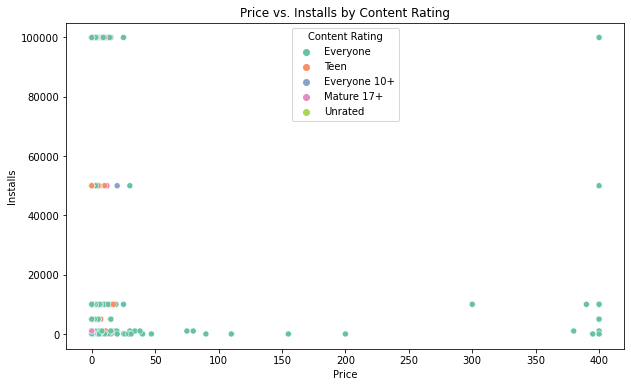

In [ ]:
# Create scatterplots of Price vs. Installs by Content Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='...', y='...', hue='Content Rating', data=..., palette='Set2')

# Add label and axis titles
plt.xlabel('Price')
plt.ylabel('Installs')
plt.title('Price vs. Installs by Content Rating')

# Add legend
plt.legend(title='Content Rating')

# show plot
plt.show()

4. How have user reviews/installs for apps changed over time?

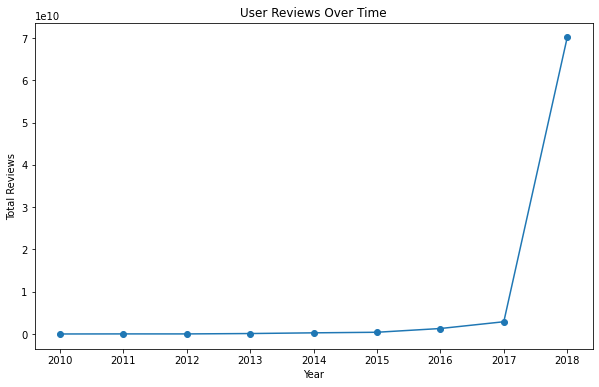

In [ ]:
# Group by year and plot the number of user installs over time
installs_over_time = apps_data.groupby(apps_data['Last Updated'].dt.year)['Installs'].sum()

plt.figure(figsize=(10,6))
plt.plot(installs_over_time.index, installs_over_time.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Installs')
plt.title('User Installs Over Time')
plt.show()

5. Is there a correlation between app price and ratings, and does it vary by app category?

    Pairplot creates a grid of scatterplots, histograms, or other plots to visualize the pairwise relationships between the variables.


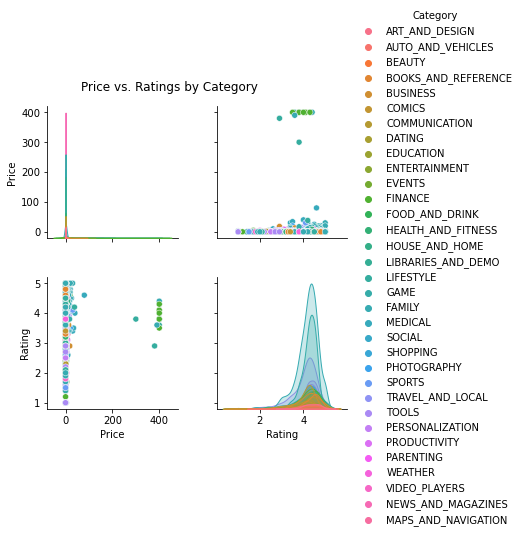

In [ ]:
# Create a scatterplot matrix
img = sns.pairplot(apps_data, vars=['Price', 'Rating'], hue='Category', diag_kind='kde')

# Adjust the subplot spacing
img.fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)  # Increase the 'top' value to adjust the super title position

# Add the super title
img.fig.suptitle('Price vs. Ratings by Category',y=1.02, x=0.5, ha='right')

# Show plot
plt.show()

- Distribution of app ratings

In [ ]:
# Average rating of apps
avg_app_rating = apps_data['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Create a histogram to show the distribution of app ratings
fig = px.histogram(..., x='Rating', title='App Rating Distribution') # app_data

# Add a vertical dashed line to indicate the average app rating
# fig.add_shape(
#     type='line',
#     x0=avg_app_rating,
#     y0=0,
#     x1=avg_app_rating,
#     y1=1000,
#     line=dict(dash='dashdot')
# )

# Show the plot
fig.show()

Average app rating =  4.173243045387994


6. How does the sentiment of user reviews vary across different app categories, and which categories tend to have more positive reviews?

In [ ]:
# Load user_reviews.csv
reviews_df = pd.read_csv("...")

# Join the two dataframes
merged_df = pd.merge(apps_data, reviews_df, on='...')

**data_reviews.csv**

| variable               | class        | description                                           |
|:-----------------------|:-------------|:------------------------------------------------------|
| App                    | character    | The application name                                  |
| Translated_Review      | character    | User review (translated to English)                   |
| Sentiment              | character    | The sentiment of the user - Positive/Negative/Neutral |
| Sentiment_Polarity     | character    | The sentiment polarity score                          |
| Sentiment_Subjectivity | character    | The sentiment subjectivity score                      |

In [ ]:
# Calculate average sentiment polarity by category
avg_sentiment_by_category = merged_df.groupby('Category')['Sentiment_Polarity'].mean().reset_index()

# Create an interactive bar chart
fig = px.bar(avg_sentiment_by_category, x='Category', y='Sentiment_Polarity',
             title='Average Sentiment Polarity by App Category',
             labels={'Sentiment_Polarity': 'Average Sentiment Polarity'})
fig.show()

7. How does the size of apps vary by category?

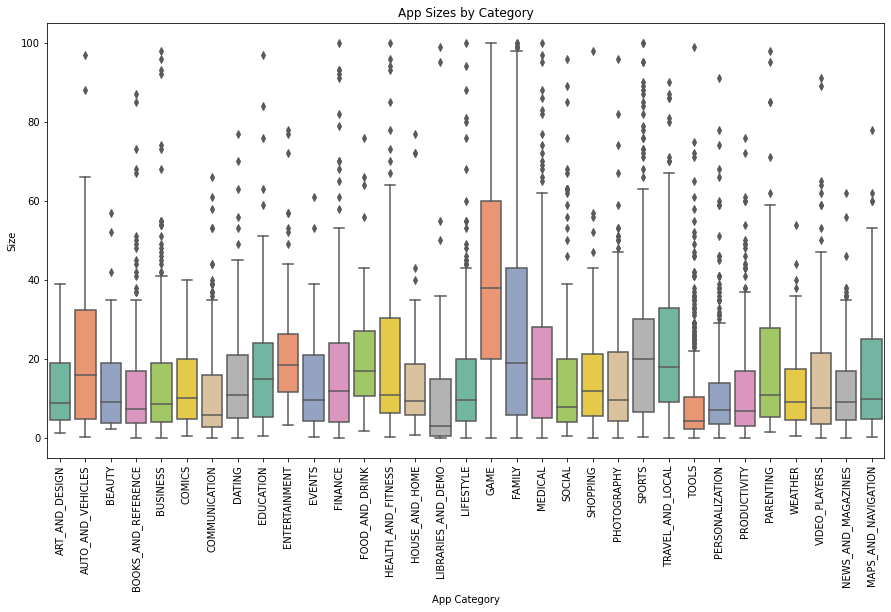

In [ ]:
# Create a box plot of app sizes by category
plt.figure(figsize=(15, 8))
sns.boxplot(x='Category', y='Size', data=apps_data, palette='Set2')

plt.xticks(rotation=90)
plt.xlabel('App Category')
plt.ylabel('Size')
plt.title('App Sizes by Category')
plt.show()

### Assignment: Attempt to explore and visualize the following questions

8. Is there a correlation between app ratings and the number of reviews?
9. How does the distribution of app prices vary by content rating?
10. Is there a relationship between app size and the number of installations?
11. What is the sentiment distribution of app reviews?

## Other Python Visualization tools

- `HoloViz`:
    - Holoviz is an ecosystem of open-source Python libraries for creating interactive data visualizations and dashboards. It provides high-level abstractions and tools for rapid development of complex visualizations with minimal code.
    - Website: [HoloViz Website](https://holoviz.org/)
    - Tutorials: [HoloViz Tutorial](https://holoviz.org/tutorial/index.html)

- `Dash`:
    - Dash is a Python framework for building interactive web applications, including interactive data dashboards.
    - Documentation: [Dash Documentation](https://dash.plotly.com/)
    - Tutorials: [Dash Tutorial](https://dash.plotly.com/introduction)

- `Streamlit`:
    - Streamlit is a Python library that makes it easy to create web applications for data science and data visualization. It's known for its simplicity and rapid development capabilities, allowing you to turn data scripts into shareable web apps quickly.
    - Documentation: [Streamlit Documentation](https://docs.streamlit.io/stable/)
    - Tutorials:
        - [Streamlit Tutorial for Beginners](https://docs.streamlit.io/stable/tutorial/index.html)
        - [Streamlit Data Science Dashboard Tutorial](https://docs.streamlit.io/stable/tutorial/create_a_data_explorer_app.html)

## Non Python Visulization tools

- `Tableau`:

    - Tableau is a widely used data visualization tool that offers a user-friendly interface for creating interactive and shareable dashboards and reports.
    - Website: [Tableau](https://www.tableau.com/)
    - Learning Resources: [Tableau Learning Resources](https://www.tableau.com/learn/training)
  
- `Power BI`:

    - Power BI is a business analytics tool by Microsoft that enables users to visualize data and share insights through interactive reports and dashboards.
    - Website: [Power BI](https://powerbi.microsoft.com/)
    - Learning Resources: [Power BI Documentation](https://docs.microsoft.com/en-us/power-bi/)

- `Microsoft Excel`:
    - Official Website: Microsoft Excel
    - Tutorials and Resources:
      - [Microsoft Excel Training](https://support.microsoft.com/en-us/excel/training)
      - [Microsoft Excel YouTube Channel](https://www.youtube.com/user/OfficeVideos)









## Other Resource
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)